In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

datapath = "/content/gdrive/My Drive/Datasets/Student/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader as DL
from torch.nn.utils import weight_norm as WN
import torch.nn.functional as F

from time import time
import random as r

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

# Helper Functions

In [3]:
def breaker():
  print("\n" + 30*"-" + "\n")

def head(x, n_of_ele=5):
  breaker()
  print(x[:no_of_ele])
  breaker()

def getCol(x):
  return [col for col in x.columns]

def getObj(x):
  s = (x.dtypes == "object")
  return list(s[s].index)

def preprocess(x, *args):
  df = x.copy()
  df[args[0]] = df[args[0]].map({"MS" : 0, "GP" : 1})
  df[args[1]] = df[args[1]].map({"M" : 0, "F" : 1})
  df[args[2]] = df[args[2]].map({"U" : 0, "R" : 1})
  df[args[3]] = df[args[3]].map({"LE3" : 0, "GT3" : 1})
  df[args[4]] = df[args[4]].map({"A" : 0, "T" : 1})
  df[args[5]] = df[args[5]].map({"services" : 0, "health" : 1, "at_home" : 2, "other" : 3, "teacher" : 4})
  df[args[6]] = df[args[6]].map({"services" : 0, "health" : 1, "at_home" : 2, "other" : 3, "teacher" : 4})
  df[args[7]] = df[args[7]].map({"reputation" : 0, "course" : 1, "other" : 2, "home" : 3})
  df[args[8]] = df[args[8]].map({"mother" : 0, "other" : 1, "father" : 2})
  df[args[9]] = df[args[9]].map({"no" : 0, "yes" : 1})
  df[args[10]] = df[args[10]].map({"no" : 0, "yes" : 1})
  df[args[11]] = df[args[11]].map({"no" : 0, "yes" : 1})
  df[args[12]] = df[args[12]].map({"no" : 0, "yes" : 1})
  df[args[13]] = df[args[13]].map({"no" : 0, "yes" : 1})
  df[args[14]] = df[args[14]].map({"no" : 0, "yes" : 1})
  df[args[15]] = df[args[15]].map({"no" : 0, "yes" : 1})
  df[args[16]] = df[args[16]].map({"no" : 0, "yes" : 1})
  return df

# Data Handling and Preprocessing

In [4]:
dataset = pd.read_csv(datapath+"student_mat.csv", sep=";")

breaker()
print(dataset.head(5))
breaker()
print(dataset.shape)
breaker()

process_df = preprocess(dataset, "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian",
                        "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic")

feats = process_df.iloc[:, :-1].copy().values
label = process_df.iloc[:, -1].copy().values

del dataset, process_df

X, X_test, y, y_test = train_test_split(feats, label, test_size=95, shuffle=True, random_state=0)

X = X.astype(float)
y = y.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

num_features = X.shape[1]
num_obs_test = X_test.shape[0]


------------------------------

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

------------------------------

(395, 33)

------------------------------



# Sklearn and XGB

In [5]:
mse = []
mae = []
r2_ = []

########## MLR ##########
mlr = LinearRegression()
mlr.fit(X, y)
y_pred = mlr.predict(X_test)

breaker()
print("MLR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("MLR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("MLR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

########## KNR ##########
knr = KNeighborsRegressor()
knr.fit(X, y)
y_pred = knr.predict(X_test)

breaker()
print("KNR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("KNR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("KNR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

########## SVR ##########
svr = SVR(kernel="rbf")
svr.fit(X, y)
y_pred = svr.predict(X_test)

breaker()
print("SVR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("SVR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("SVR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

########## DTR ##########
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X, y)
y_pred = dtr.predict(X_test)

breaker()
print("DTR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("DTR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("DTR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

########## RFR ##########
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X, y)
y_pred = rfr.predict(X_test)

breaker()
print("RFR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("RFR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("RFR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

########## XGR ##########
xgr = XGBRegressor(random_state=0, objective="reg:squarederror")
xgr.fit(X, y)
y_pred = xgr.predict(X_test)

breaker()
print("XGR MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("XGR MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("XGR R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))

breaker()


------------------------------

MLR MAE : 1.586208
MLR MSE : 6.311846
MLR R2  : 0.77993

------------------------------

KNR MAE : 1.663158
KNR MSE : 6.897684
KNR R2  : 0.75951

------------------------------

SVR MAE : 1.632955
SVR MSE : 7.711961
SVR R2  : 0.73112

------------------------------

DTR MAE : 1.084211
DTR MSE : 4.284211
DTR R2  : 0.85063

------------------------------

RFR MAE : 1.166105
RFR MSE : 3.698293
RFR R2  : 0.87106

------------------------------

XGR MAE : 1.248054
XGR MSE : 4.025498
XGR R2  : 0.85965

------------------------------



# ANN

**Config**

In [6]:
class DS(Dataset):
  def __init__(this, X=None, y=None, mode="train"):
    this.mode = mode
    this.X = X
    if mode == "train":
      this.y = y
  
  def __len__(this):
    return this.X.shape[0]
  
  def __getitem__(this, idx):
    if this.mode == "train":
      return torch.FloatTensor(this.X[idx]), torch.FloatTensor(this.y[idx])
    else:
      return torch.FloatTensor(this.X[idx])

In [7]:
class CFG():
  tr_batch_size = 64
  va_batch_size = 64
  ts_batch_size = 64

  epochs = 100
  n_folds = 4

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  IL = num_features
  HL_1 = [16]
  HL_2 = [32, 32]
  OL = 1

cfg = CFG()

ts_data_setup = DS(X_test, None, "test")
ts_data = DL(ts_data_setup, batch_size=cfg.ts_batch_size, shuffle=False)

**Setup**

In [8]:
class MLP(nn.Module):
  def __init__(this, IL=None, HL=None, OL=None):
    super(MLP, this).__init__()

    this.HL = HL
    this.DP1 = nn.Dropout(p=0.2)
    this.DP2 = nn.Dropout(p=0.5)

    if len(HL) == 1:
      this.BN1 = nn.BatchNorm1d(IL)
      this.FC1 = WN(nn.Linear(IL, HL[0]))

      this.BN2 = nn.BatchNorm1d(HL[0])
      this.FC2 = WN(nn.Linear(HL[0], OL))

    elif len(HL) == 2:
      this.BN1 = nn.BatchNorm1d(IL)
      this.FC1 = WN(nn.Linear(IL, HL[0]))

      this.BN2 = nn.BatchNorm1d(HL[0])
      this.FC2 = WN(nn.Linear(HL[0], HL[1]))

      this.BN3 = nn.BatchNorm1d(HL[1])
      this.FC3 = WN(nn.Linear(HL[1], OL))
    
    else:
      raise NotImplementedError("Only Supports Networks of Depth 1 and 2")
  
  def getOptimizer(this):
    return optim.Adam(this.parameters(), lr=1e-2, weight_decay=0)

  def forward(this, x):
    if len(this.HL) == 1:
      x = this.BN1(x)
      x = this.DP1(x)
      x = F.relu(this.FC1(x))
      x = this.BN2(x)
      x = this.DP2(x)
      x = this.FC2(x)
    else:
      x = this.BN1(x)
      x = this.DP1(x)
      x = F.relu(this.FC1(x))
      x = this.BN2(x)
      x = this.DP2(x)
      x = F.relu(this.FC2(x))
      x = this.BN3(x)
      x = this.DP2(x)
      x = this.FC3(x)
    return x

In [9]:
def train_fn(X=None, y=None, n_folds=None, HL_Used=None):
  breaker()
  print("Training ...")
  breaker()

  LP = []
  names = []
  bestLoss = {"train" : np.inf, "valid" : np.inf}
  fold = 0
  start_time = time()
  for tr_idx, va_idx in KFold(n_splits=n_folds, shuffle=True, random_state=0).split(X, y):
    print("Processing Fold {fold} ...".format(fold=fold+1))
    X_train, X_valid, y_train, y_valid = X[tr_idx], X[va_idx], y[tr_idx], y[va_idx]

    tr_data_setup = DS(X_train, y_train.reshape(-1, 1))
    va_data_setup = DS(X_valid, y_valid.reshape(-1, 1))

    dataloaders = {"train" : DL(tr_data_setup, batch_size=cfg.tr_batch_size, shuffle=True, generator=torch.manual_seed(0)),
                   "valid" : DL(va_data_setup, batch_size=cfg.va_batch_size, shuffle=False)
                  }

    torch.manual_seed(0)
    model = MLP(cfg.IL, HL_Used, cfg.OL)
    model.to(cfg.device)

    optimizer = model.getOptimizer()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, eps=1e-6)

    for e in range(cfg.epochs):
      epochLoss = {"train" : 0, "valid" : 0}
      for phase in ["train", "valid"]:
        if phase == "train":
          model.train()
        else:
          model.eval()
        lossPerPass = 0

        for feat, label in dataloaders[phase]:
          feat, label = feat.to(cfg.device), label.to(cfg.device)

          optimizer.zero_grad()
          with torch.set_grad_enabled(phase == "train"):
            output = model(feat)
            loss_1 = nn.MSELoss()(output, label)
            loss_2 = nn.L1Loss()(output, label)
            loss = loss_1 + loss_2
            if phase == "train":
              loss.backward()
              optimizer.step()
          lossPerPass += (loss.item() / label.shape[0])
        epochLoss[phase] = lossPerPass
      LP.append(epochLoss)
      scheduler.step(epochLoss["valid"])
      if epochLoss["valid"] < bestLoss["valid"]:
        bestLoss = epochLoss
        name = "Model_{id}_Fold_{fold}.pt".format(id=len(HL_Used), fold=fold)
        names.append(name)
        torch.save(model.state_dict(), datapath+name)
    fold += 1

  breaker()
  print("Time Taken to Train {fold} folds for {e} epochs : {:.2f} seconds".format(time()-start_time, fold=n_folds, e=cfg.epochs))
  breaker()

  return LP, names, model


def eval_fn(model=None, names=None, dataloader=None):
  y_pred = np.zeros((num_obs_test, 1))

  for name in names:
    Pred = torch.zeros(cfg.ts_batch_size, 1).to(cfg.device)
    model.load_state_dict(torch.load(datapath+name))
    model.eval()
    for feat in dataloader:
      with torch.no_grad():
        output = model(feat)
      Pred = torch.cat((Pred, output), axis=0)
    Pred = Pred[cfg.ts_batch_size:].cpu().numpy()
    y_pred = np.add(y_pred, Pred)
  y_pred = np.divide(y_pred, len(names))
  return y_pred.reshape(-1)

# Configuration 1


------------------------------

Training ...

------------------------------

Processing Fold 1 ...
Processing Fold 2 ...
Processing Fold 3 ...
Processing Fold 4 ...

------------------------------

Time Taken to Train 4 folds for 100 epochs : 6.22 seconds

------------------------------

ANN_1 MAE : 1.876643
ANN_1 MSE : 7.654108
ANN_1 R2  : 0.73313

------------------------------



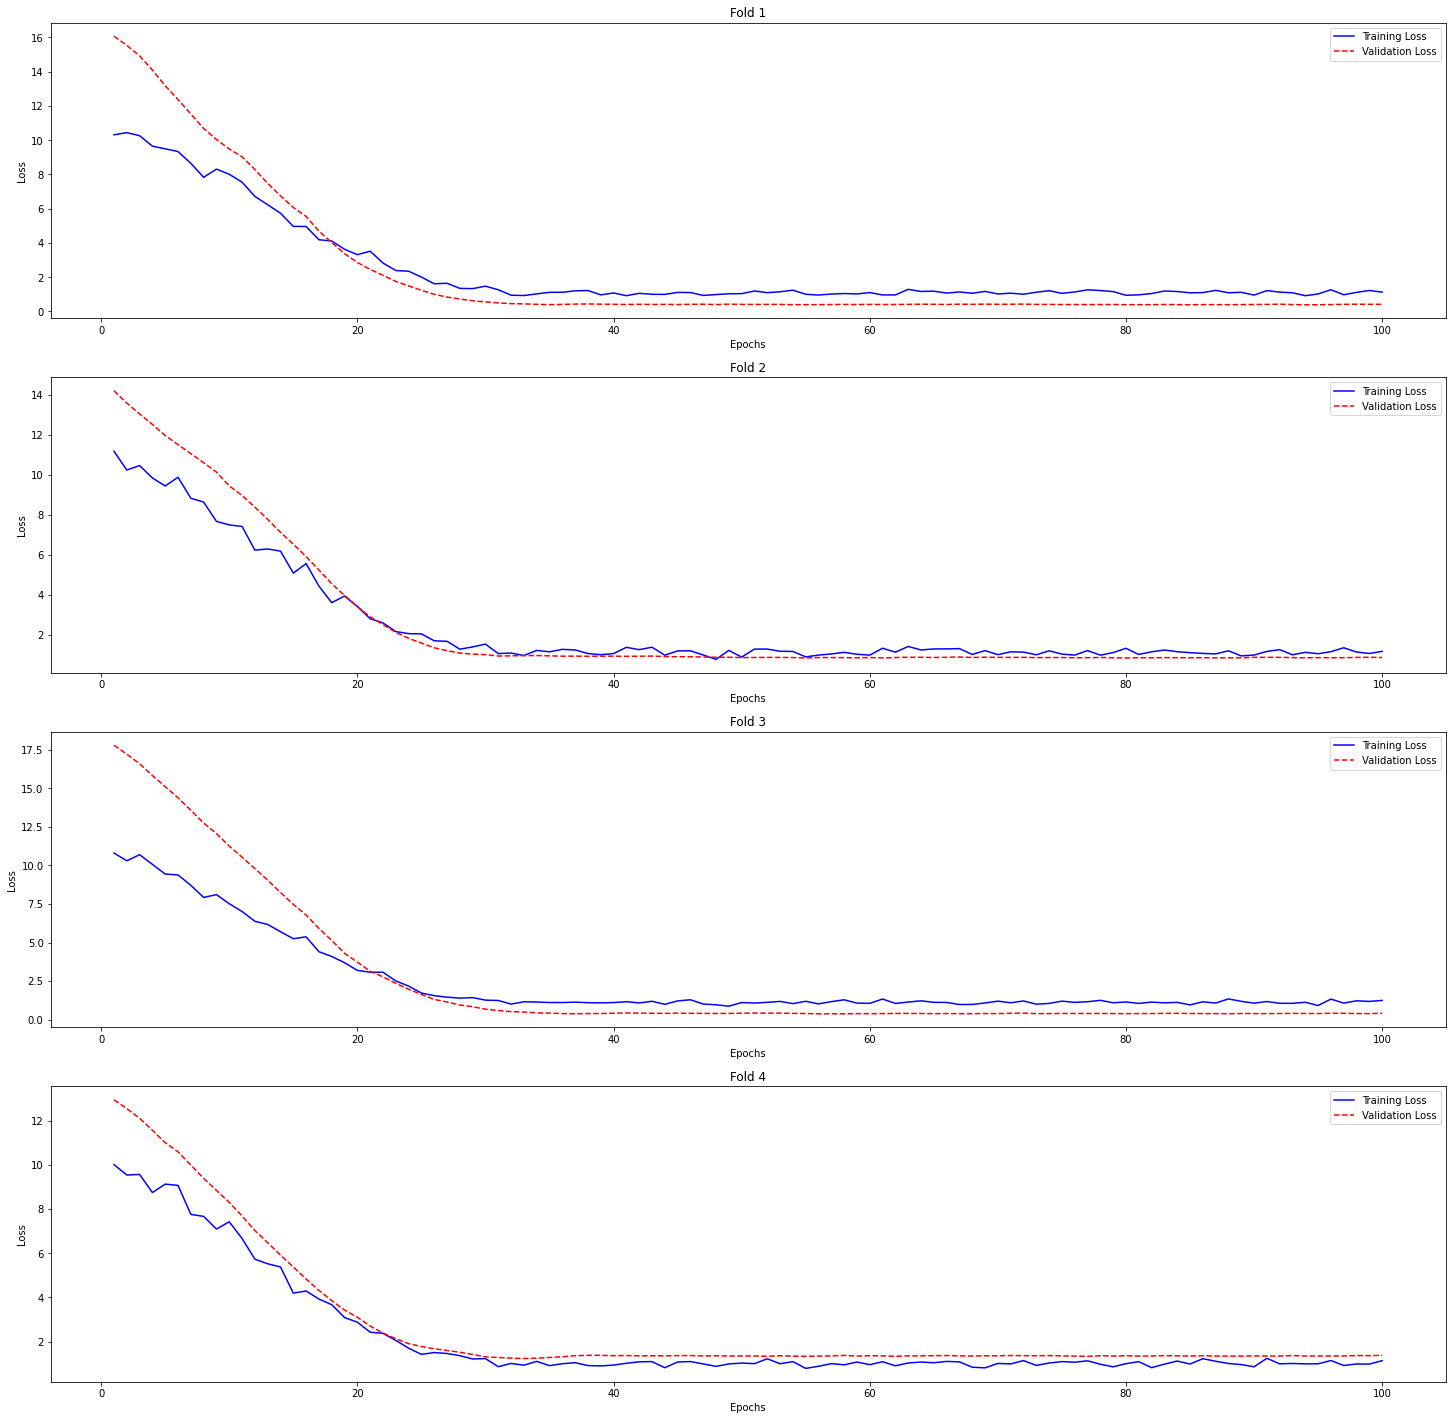

In [10]:
LP_1, Names_1, Network_1 = train_fn(X=X, y=y, n_folds=cfg.n_folds, HL_Used=cfg.HL_1)

y_pred = eval_fn(Network_1, Names_1, ts_data)
print("ANN_1 MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("ANN_1 MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("ANN_1 R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))
breaker()

LPT = []
LPV = []

for i in range(len(LP_1)):
  LPT.append(LP_1[i]["train"])
  LPV.append(LP_1[i]["valid"])

xAxis = [i+1 for i in range(cfg.epochs)]
plt.figure(figsize=(25, 25))
for fold in range(4):
    plt.subplot(4, 1, fold+1)
    plt.plot(xAxis, LPT[fold*cfg.epochs:(fold+1)*cfg.epochs], "b", label="Training Loss")
    plt.plot(xAxis, LPV[fold*cfg.epochs:(fold+1)*cfg.epochs], "r--", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Fold {fold}".format(fold=fold+1))
plt.show()

# Configuration 2

In [ ]:
LP_2, Names_2, Network_2 = train_fn(X=X, y=y, n_folds=cfg.n_folds, HL_Used=cfg.HL_2)

y_pred = eval_fn(Network_2, Names_2, ts_data)
print("ANN_2 MAE : {:.6f}".format(mean_absolute_error(y_test, y_pred)))
print("ANN_2 MSE : {:.6f}".format(mean_squared_error(y_test, y_pred)))
print("ANN_2 R2  : {:.5f}".format(r2_score(y_test, y_pred)))
mae.append(mean_absolute_error(y_test, y_pred))
mse.append(mean_squared_error(y_test, y_pred))
r2_.append(r2_score(y_test, y_pred))
breaker()

LPT = []
LPV = []

for i in range(len(LP_2)):
  LPT.append(LP_2[i]["train"])
  LPV.append(LP_2[i]["valid"])

xAxis = [i+1 for i in range(cfg.epochs)]
plt.figure(figsize=(25, 25))
for fold in range(4):
    plt.subplot(4, 1, fold+1)
    plt.plot(xAxis, LPT[fold*cfg.epochs:(fold+1)*cfg.epochs], "b", label="Training Loss")
    plt.plot(xAxis, LPV[fold*cfg.epochs:(fold+1)*cfg.epochs], "r--", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Fold {fold}".format(fold=fold+1))
plt.show()


------------------------------

Training ...

------------------------------

Processing Fold 1 ...
Processing Fold 2 ...
Processing Fold 3 ...
Processing Fold 4 ...


# Plots

In [ ]:
labels = ["MLR", "KNR", "SVR", "DTR", "RFR", "XGR", "ANN_1", "ANN_2"]

x_Axis = [i for i in range(len(labels))]

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.stem(x_Axis, mse, markerfmt="bo", linefmt="r-", use_line_collection=True)
ax.set_xlabel("Models")
ax.set_ylabel("MSE")
ax.set_title("Models v/s MSE")
ax.set_xticks(x_Axis)
ax.set_xticklabels(labels)
plt.show()

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.stem(x_Axis, mae, markerfmt="bo", linefmt="r-", use_line_collection=True)
ax.set_xlabel("Models")
ax.set_ylabel("MAE")
ax.set_title("Models v/s MAE")
ax.set_xticks(x_Axis)
ax.set_xticklabels(labels)
plt.show()

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.stem(x_Axis, r2_, markerfmt="bo", linefmt="r-", use_line_collection=True)
ax.set_xlabel("Models")
ax.set_ylabel("R2 Score")
ax.set_title("Models v/s R2 Score")
ax.set_xticks(x_Axis)
ax.set_xticklabels(labels)
plt.show()